In [1]:
import openpyxl
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xticks, yticks

In [2]:
df2 = pd.read_csv('facs/faculty_data_with_linkedin_2.csv')
df = df2.copy(deep=False)

In [21]:
df.head()

,Unnamed: 0,Name,Organization,Designation,Department,Qualification,Email,Areas of interest,LinkedIn,Facebook,Twitter,Website,phone
0,0,Dr. Ankita Srivastava,Manipal Institute of Technology,Assistant Professor,Department of Aeronautical & Automobile Engine...,B.Tech. (Electronics & Communications Engineer...,ankita.srivastava@manipal.edu\n\n ...,"communication networking, vehicular ad hoc net...",dr-ankita-srivastava-42486a1b4,na,na,na,na
1,1,Hilda Mayrose,Manipal Institute of Technology,Assistant Professor -Senior Scale,Department of Biomedical Engineering,"B.E.(Biomedical Engg.), M.Tech.(Biomedical Eng...",hilda.mayrose@manipal.edu \n\n ...,biomedical instrumentation & signal analysis,NaN,na,na,na,na
2,2,Dr. Goutam Thakur,Manipal Institute of Technology,Associate Professor,Department of Biomedical Engineering,"B. Pharm.( Pharmaceutical Sciences), ME (Biome...",goutam.thakur@manipal.edu \n\n ...,"biomaterials, tissue engineering, drug deliver...",goutam-thakur-63149915,na,na,na,na
3,3,Rajitha K V,Manipal Institute of Technology,Assistant Professor -Senior scale,Department of Biomedical Engineering,"B.E.(Biomedical Engg.), M.Tech. (Biomedical En...",rajitha.kv@manipal.edu \n\n ...,"medical instrumentation,,,",NaN,na,na,na,na
4,4,Lawrence D Almeida,Manipal Institute of Technology,Associate Professor,Department of Biomedical Engineering,"B.E. (E&C), M.Tech. (Biomedical Engg.)\n ...",ld.almeida@manipal.edu\n\n ...,"control systems, digital electronics and ic sy...",lawrence-d-almeida-71a0b8174,na,na,na,na


In [3]:
for i in range(0, len(df.Email)):
    df.Email[i] = df.Email[i].replace('\n', '')
    df.Email[i] = df.Email[i].replace(' ', '')

D:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
for i in range(0, len(df.Email)):
    if 'linkedin' in str(df.LinkedIn[i]):
        x = str(df.LinkedIn[i])
        # print(x[x.find('.com/in/')+8:len(x)-1])
        df.LinkedIn[i] = x[x.find('.com/in/') + 8:len(x) - 1]
        # break

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [28]:
df.columns

Index(['Unnamed: 0', 'Name', 'Organization', 'Designation', 'Department',
       'Qualification', 'Email', 'Areas of interest', 'LinkedIn', 'Facebook',
       'Twitter', 'Website', 'phone'],
      dtype='object')

In [5]:
df = df.drop('Unnamed: 0', axis = 1)

In [6]:
df = df.replace('na', np.nan)

In [ ]:
df['Qualification'] = df['Qualification'].replace('Qualification', '')

In [ ]:
df.head(10)

In [102]:
interests = {}
for i in df['Areas of interest']:
    if i is not None:
        x = str(i).split(',')
        for j in x:
            j = j.replace('and', '')
            j = j.strip()
            j = ''.join(char for char in j if char.isalnum())
            try:
                interests[j] += 1
            except:
                interests[j] = 1


In [103]:
# interests = sorted(interests)
interest = dict(sorted(interests.items(), key = lambda item: item[1]))


In [ ]:
for i in interest.keys():
    print(i, " ", interest[i])

In [7]:
print(df.LinkedIn.isna().sum(), "are NA out of ", len(df.LinkedIn))
print(df.LinkedIn.isna().sum()/len(df.LinkedIn))

145 are NA out of  649
0.22342064714946072


In [8]:
print(df.Twitter.isna().sum(), "are NA out of ", len(df.Twitter))
print(df.Twitter.isna().sum() / len(df.Twitter))


647 are NA out of  649
0.9969183359013868


In [14]:
for i in df.Twitter:
    if str(i) == 'nan':
        continue
    else:
        print(i)
    # print(str(i))


https://mobile.twitter.com/manjuna61689581
https://twitter.com/hriteshbhat


In [9]:
print(df.Facebook.isna().sum(), "are NA out of ", len(df.Facebook))
print(df.Facebook.isna().sum() / len(df.Facebook))


638 are NA out of  649
0.9830508474576272


In [90]:
print(df.Website.isna().sum(), "are NA out of ", len(df.Website))
print(df.Website.isna().sum() / len(df.Website))


611 are NA out of  649
0.9414483821263482


In [137]:
myset = dict()
for i in range(0, len(df['Designation'])):
    x = df['Designation'][i].lower()
    x = x.replace('and','')
    df['Designation'][i] = ''.join(char for char in x if char.isalnum())
    try:
        myset[df['Designation'][i]] += 1
    except:
        myset[df['Designation'][i]] = 1
    # print(x)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [138]:
print("Total designations: ", len(myset))
print("Designations with more than 5 people: ")
print(" ")
for i in myset:
    if myset[i] < 5:
        continue
    print(i, " ", myset[i])

Total designations:  28
Designations with more than 5 people: 
 
assistantprofessor   149
assistantprofessorseniorscale   188
associateprofessor   58
professor   75
associateprofessorseniorscale   59
assistantprofessorselectiongrade   77
assistantprofessoronstudyleave   5
professorhead   8
professorhod   6


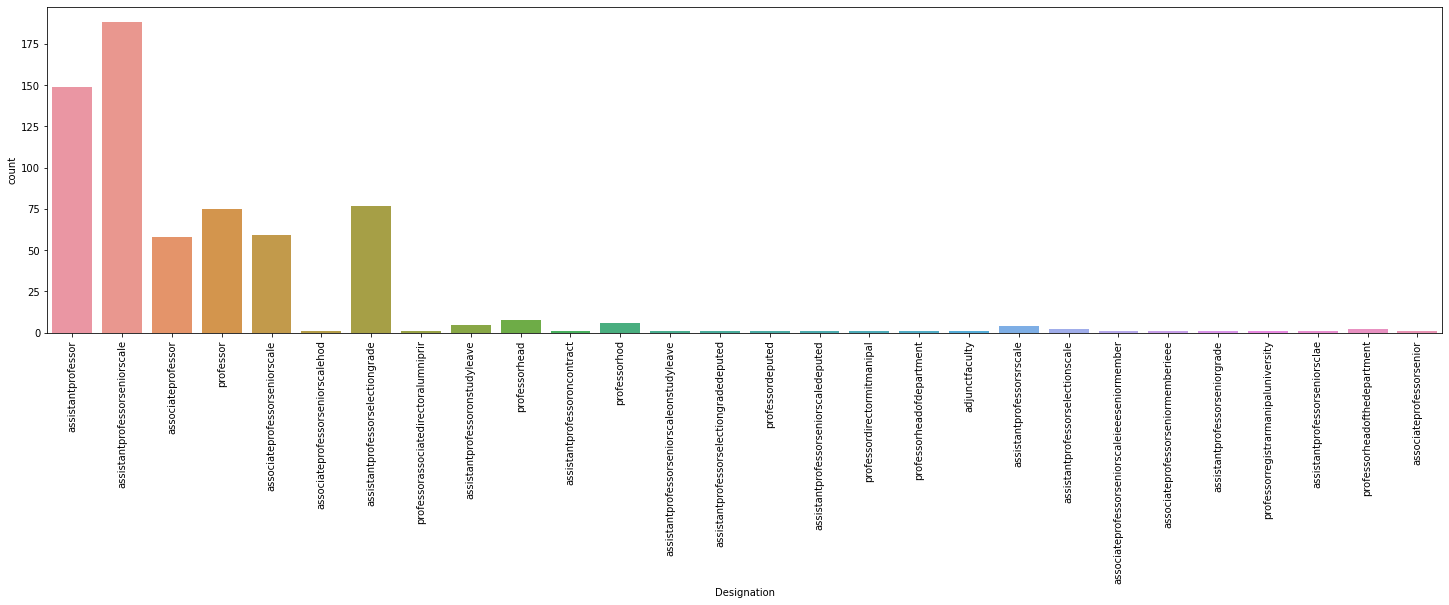

In [139]:
plt.subplots(figsize = (25,6))
sns.countplot(df['Designation'])
x = xticks(rotation =90)

total departments:  18


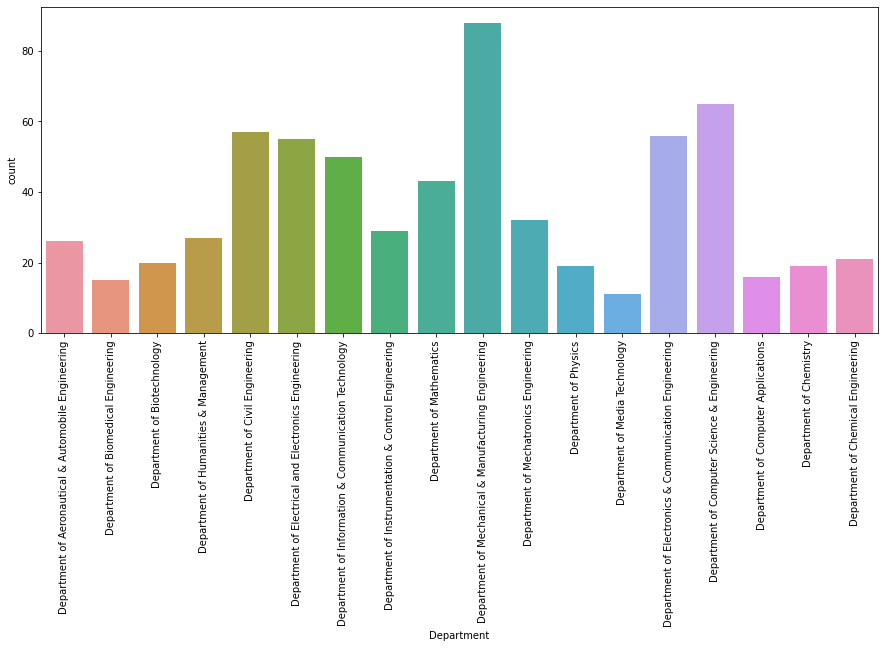

In [145]:
plt.subplots(figsize=(15, 6))
sns.countplot(df['Department'])
x = xticks(rotation=90)
print("total departments: ", len(x[1]))

total departments:  18


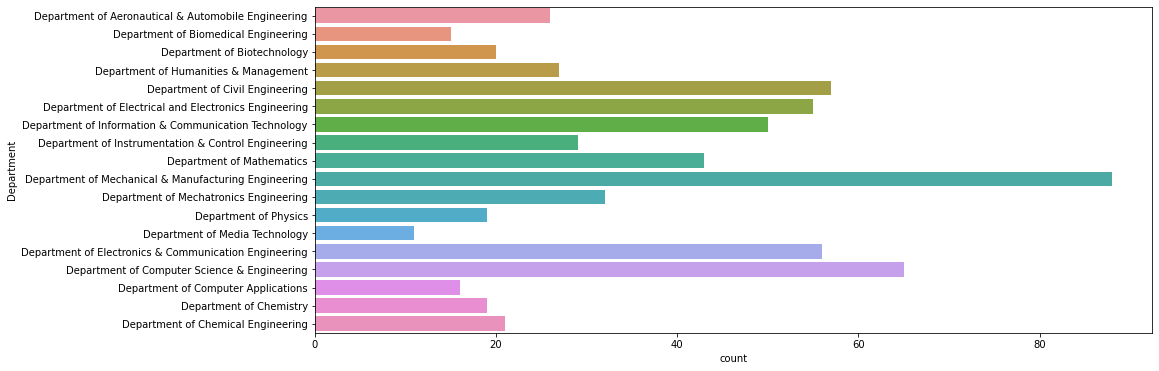

In [144]:
plt.subplots(figsize=(15, 6))
sns.countplot(y=df['Department'])
x = yticks()
print("total departments: ", len(x[1]))

https://mobile.twitter.com/manjuna61689581
https://twitter.com/hriteshbhat


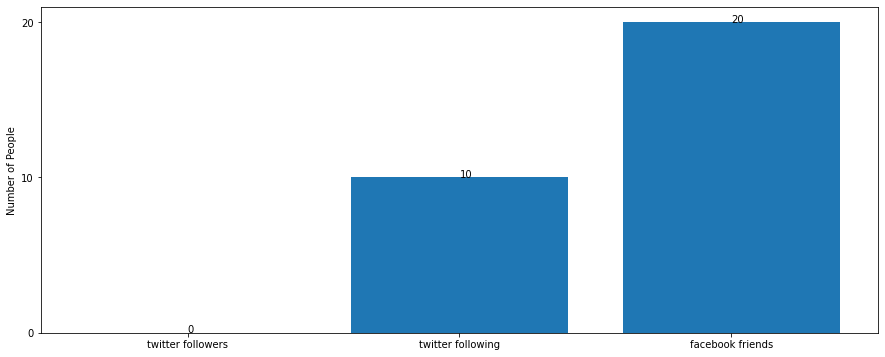

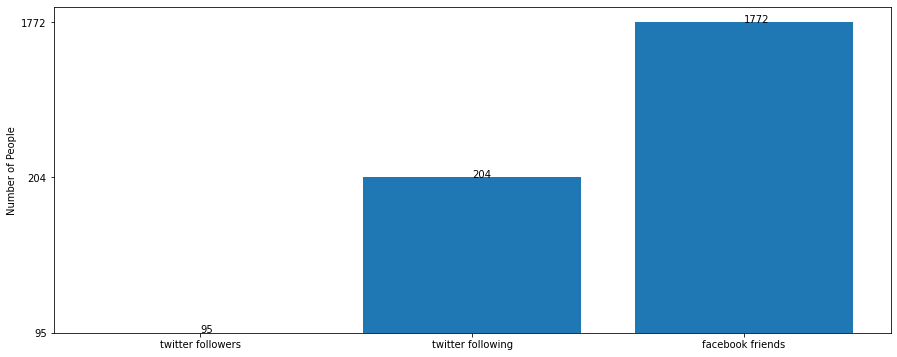

In [36]:
df_2 = pd.read_csv('twittter_and_facebook.csv')
# print(df_2.columns)
count = 1
for i in range(0, len(df_2['Twitter'])):
    if str(df_2['Twitter'][i]) != 'na' and str(df_2['Facebook'][i]) != 'na':
        print(df['Twitter'][i])
        l1 = ['twitter followers', 'twitter following', 'facebook friends']
        l2 = [
            df_2['Number of followers'][i], df_2['Following'][i],
            df_2['facebook_friends'][i]
        ]
        plt.subplots(figsize = (15,6))
        plt.bar(l1, l2)
        for index, value in enumerate(l2):
            plt.text(index, index, str(value))
        plt.ylabel('Number of People')

